In [1]:
import os
import numpy as np
from dataset import get_data,get_HOG, standardize
from matplotlib import pyplot as plt

######################## Get train/test dataset ########################
X_train,X_test,Y_train,Y_test = get_data('dataset')
########################## Get HoG featues #############################
H_train,H_test = get_HOG(X_train), get_HOG(X_test)
######################## standardize the HoG features ####################
H_train,H_test = standardize(H_train), standardize(H_test)
########################################################################
######################## Implement you code here #######################
########################################################################

*********** extract HoG features ***********


100%|██████████| 10000/10000 [00:02<00:00, 4329.08it/s]


*********** extract HoG features ***********


100%|██████████| 2000/2000 [00:00<00:00, 4345.78it/s]


https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC  
https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC  
https://www.cnblogs.com/komean/p/11008586.html

In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Linear SVM

### Training

In [6]:
clf = SVC(kernel="linear")
clf.fit(H_train, Y_train)

SVC(kernel='linear')

### Accuracy

In [8]:
print(f"Accuracy of Linear SVM: {np.sum(clf.predict(H_test) == Y_test) / Y_test.shape[0]}")

Accuracy of Linear SVM: 0.846


### Count support vectors

In [9]:
print(f"Number of support vectors: {np.sum(clf.n_support_)}")

Number of support vectors: 3714


### Count positive and negative support vectors

In [10]:
print("Number of negative support vectors: {}\nNumber of positive support vectors: {}".format(*clf.n_support_))

Number of negative support vectors: 1845
Number of positive support vectors: 1869


### Visualize the top 20 images

In [11]:
idx = np.argsort(clf.dual_coef_[0])
def find_original_idx(idx_in_support_vector: int) -> int:
    '''
    return the original index of support_vectors_[idx_in_support_vector] in H_train.
    '''
    return np.where(np.equal(H_train, clf.support_vectors_[idx_in_support_vector]).all(axis=1))[0][0]

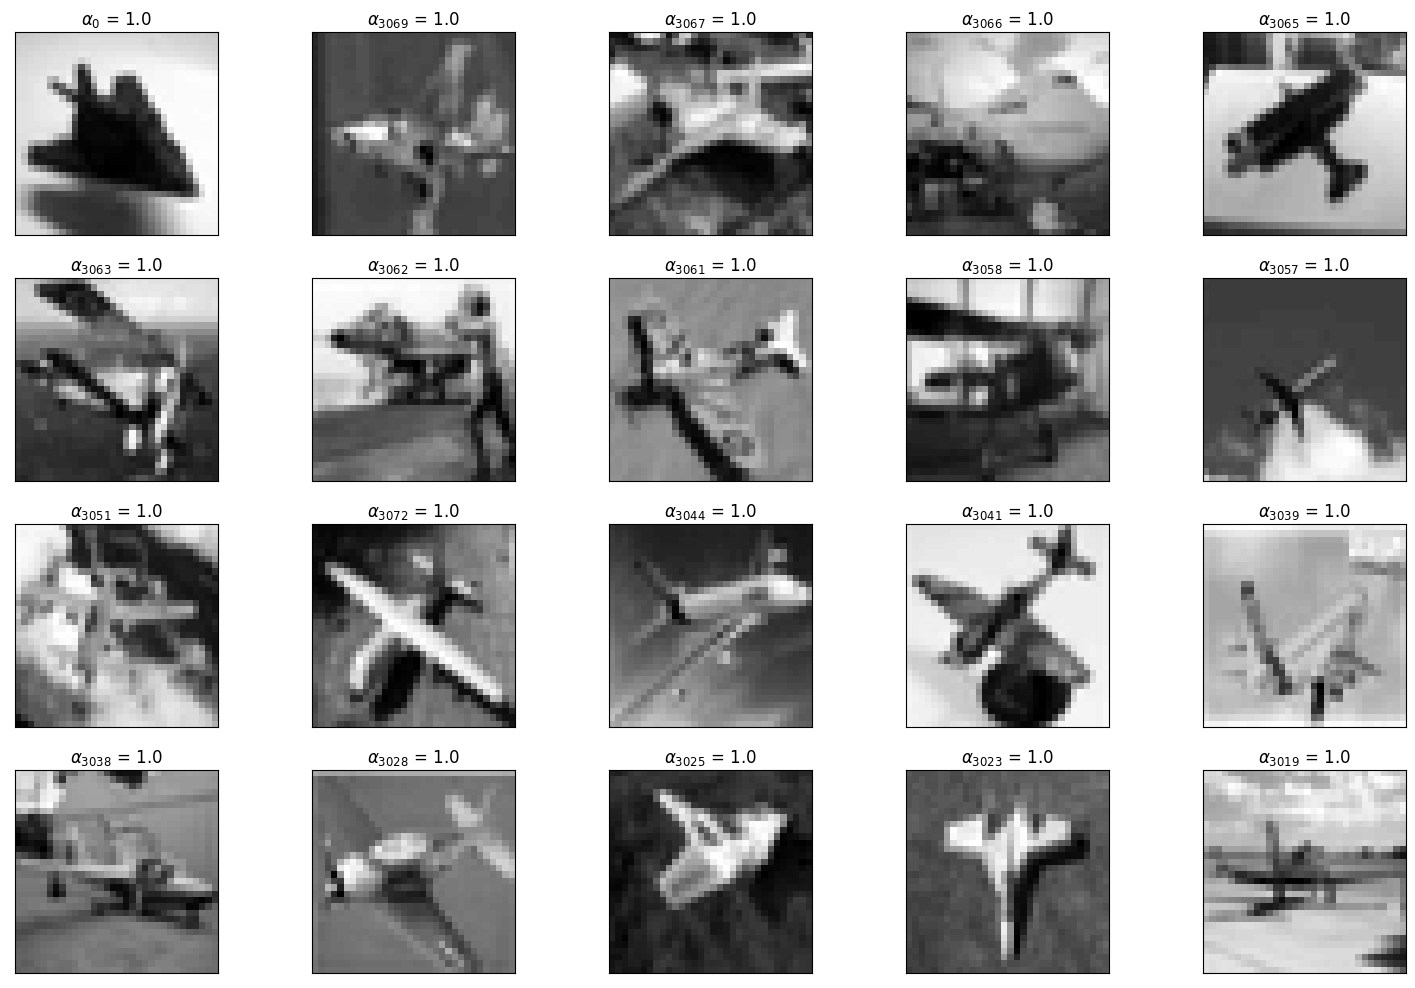

In [17]:
fig, ax = plt.subplots(4, 5, figsize=(15, 10))
fig.tight_layout(h_pad=1)
for i, elem in enumerate(idx[:20]):
    plt.subplot(4, 5, i + 1)
    ori_idx = find_original_idx(elem)
    plt.imshow(X_train[ori_idx], cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.title(r"$\alpha_{" + str(ori_idx) + r"}$ = " + str(clf.dual_coef_[0][elem] / np.sign(Y_train[ori_idx] - 0.5)))
plt.savefig("airplane.svg")
plt.show()

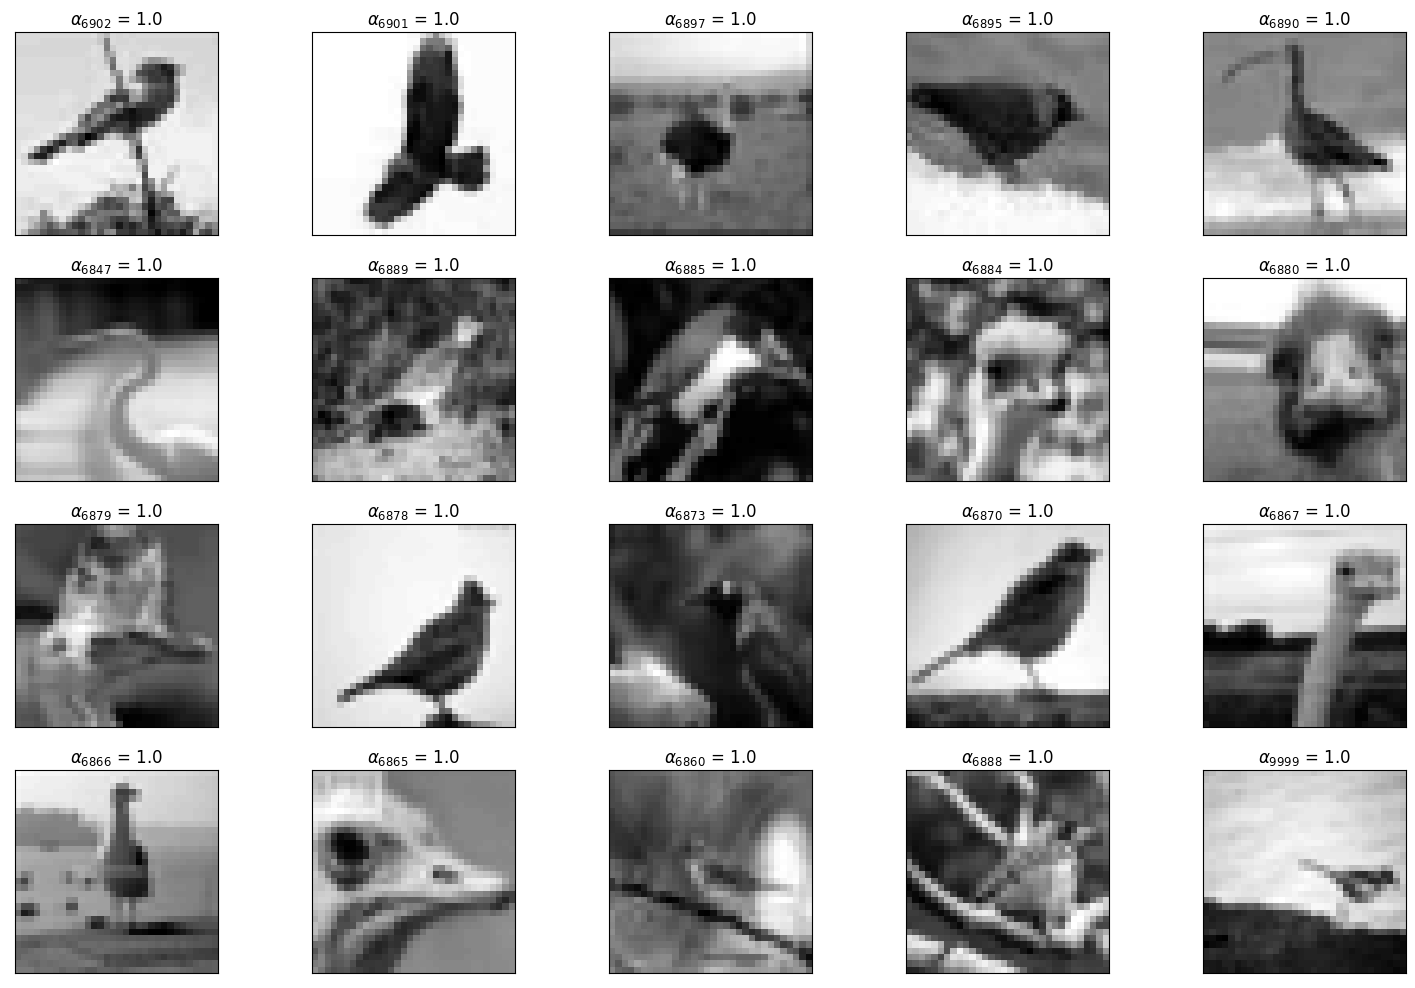

In [18]:
fig, ax = plt.subplots(4, 5, figsize=(15, 10))
fig.tight_layout(h_pad=1)
for i, elem in enumerate(idx[-20:]):
    plt.subplot(4, 5, i + 1)
    ori_idx = find_original_idx(elem)
    plt.imshow(X_train[ori_idx], cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.title(r"$\alpha_{" + str(ori_idx) + r"}$ = " + str(clf.dual_coef_[0][elem] / np.sign(Y_train[ori_idx] - 0.5)))
plt.savefig("bird.svg")
plt.show()

## RBF kernel SVM

### Tune hyper-parameters

In [10]:
1 / (H_train.shape[1] * H_train.var())  # default gamma

0.003086419753086423

In [11]:
param_grid = {'gamma': [0.002, 0.003, 0.004, 0.005, 0.006, 0.007]}
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, scoring='accuracy', cv=5)
grid_search.fit(H_train, Y_train)
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameters: {'gamma': 0.005}
Best score: 0.8785000000000001


### Training & Testing

In [12]:
clf_rbf = SVC(kernel='rbf')
clf_rbf.fit(H_train, Y_train)
np.sum(clf_rbf.predict(H_test) == Y_test) / Y_test.shape[0]

0.8795

In [13]:
clf_rbf = SVC(gamma=0.005, kernel='rbf')
clf_rbf.fit(H_train, Y_train)
np.sum(clf_rbf.predict(H_test) == Y_test) / Y_test.shape[0]

0.8815

## Polynomial kernel SVM

### Tune hyper-parameters

In [19]:
param_grid = {'coef0': [0.125, 0.25, 0.375], 'degree': [3, 4, 5, 6]}
svm = SVC(kernel='poly')
grid_search = GridSearchCV(svm, param_grid, scoring='accuracy', cv=5)
grid_search.fit(H_train, Y_train)
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameters: {'coef0': 0.25, 'degree': 3}
Best score: 0.8803000000000001


### Training & Testing

In [3]:
clf_poly = SVC(kernel='poly')
clf_poly.fit(H_train, Y_train)
np.sum(clf_poly.predict(H_test) == Y_test) / Y_test.shape[0]

0.868

In [4]:
clf_poly = SVC(kernel='poly', coef0=0.25, degree = 3)
clf_poly.fit(H_train, Y_train)
np.sum(clf_poly.predict(H_test) == Y_test) / Y_test.shape[0]

0.88